In [1]:
# CÓDIGO PARA BAIXAR AS BIBLIOTECAS
# !pip install pandas
# !pip install matplotlib
# !pip install yfinance
# !pip install DateTime 
# !pip install numpy 

In [2]:
# IMPORTANDO TODAS AS BIBLIOTECAS UTILIZADA NESSE PROJETO
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta, datetime
import numpy as np

In [3]:
# DETERMINANDO A EMPRESA E A QUANTIDADE DE DIAS PARA A ANÁLISE
quant_dias = 5000
ticker = "GGBR4.SA" # GERDAU

In [4]:
# OBTENDO A DATA ATUAL E A DATA DO INÍCIO DA ANÁLISE
data_atual = datetime.now()
data_periodo = data_atual - timedelta(days=quant_dias)

In [5]:
# BAIXANDO TODA SÉRIE HISTÓRICA DO ATIVO 
precos_acoes = yf.download(ticker, start = data_periodo, end = data_atual)

[*********************100%***********************]  1 of 1 completed


In [6]:
# EXIBINDO O DATAFRAME DA SÉRIE HISTÓRICA DOS PREÇOS
precos_acoes

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-22,17.134920,17.142857,16.626984,16.738094,10.158787,5319216
2010-11-23,16.349207,16.563492,16.269840,16.269840,9.874596,6142752
2010-11-24,16.428572,16.793650,16.373014,16.746031,10.163604,5596164
2010-11-25,16.642857,16.698412,16.325396,16.325396,9.908312,3633210
2010-11-26,16.190475,16.317459,15.817460,15.928571,9.667468,7466634
...,...,...,...,...,...,...
2024-07-24,18.040001,18.129999,17.610001,17.950001,17.950001,15129600
2024-07-25,17.820000,18.480000,17.780001,18.320000,18.320000,13581600
2024-07-26,18.120001,18.389999,17.930000,18.320000,18.320000,11820100


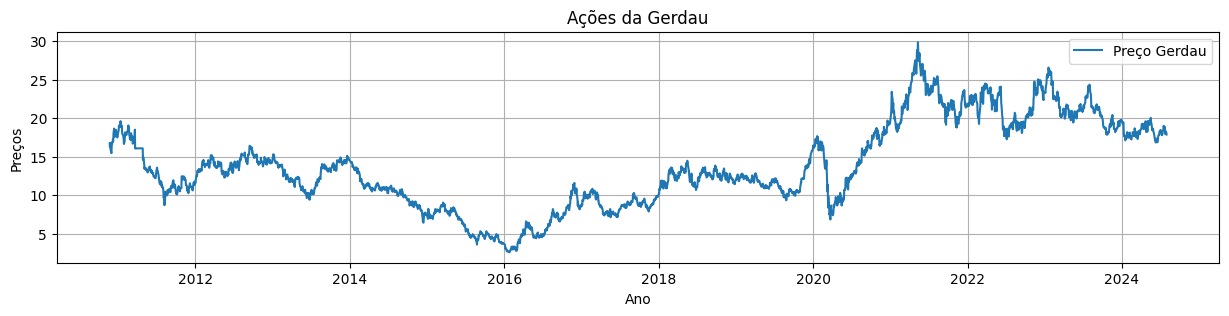

In [7]:
# PLOTANDO O GRÁFICO
plt.figure(figsize=(15,3))
plt.plot(precos_acoes["Close"], label="Preço Gerdau")
plt.title("Ações da Gerdau")
plt.ylabel("Preços")
plt.xlabel("Ano")
plt.grid()
plt.legend()
plt.show()

In [8]:
# OBTENDO A DATA EM QUE FOI COMPRADO O ATIVO E O SEU VALOR 
data_compra = pd.to_datetime("2024-06-18")
df_filtro = precos_acoes.query('Date==@data_compra')
df_filtro

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-18,16.889999,17.129999,16.84,16.98,16.98,6467700


In [9]:
# OBTENDO, DO DATAFRAME, APENAS AS COLUNAS DA DATA E DO PREÇO DE FECHAMENTO
data_compra_filtro = df_filtro.index[0]
preco_compra_filtro = df_filtro["Close"].iloc[0]

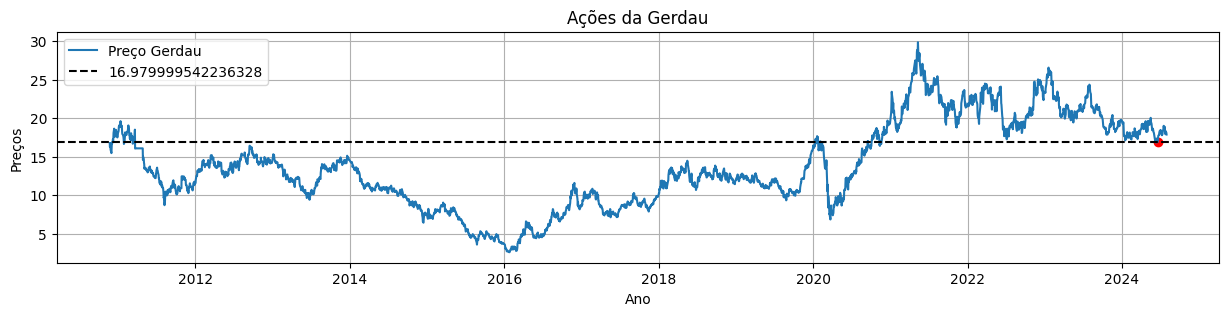

In [10]:
# PLOTANDO O GRÁFICO E COLOCANDO UMA LINHA TRACEJADA COMO REFERÊNCIA DO VALOR DA COMPRA DO ATIVO
plt.figure(figsize=(15,3))
plt.plot(precos_acoes["Close"], label="Preço Gerdau")
plt.scatter(data_compra_filtro,preco_compra_filtro, color='red')
plt.axhline(preco_compra_filtro, color='black', linestyle='--', label = preco_compra_filtro)

plt.title("Ações da Gerdau")
plt.ylabel("Preços")
plt.xlabel("Ano")
plt.grid()
plt.legend()
plt.show()

In [11]:
# OBTENDO A DATA ATUAL E O PREÇO ATUAL DO ATIVO
data_atual = precos_acoes.index[-1]
preco_atual = precos_acoes["Close"].iloc[-1]

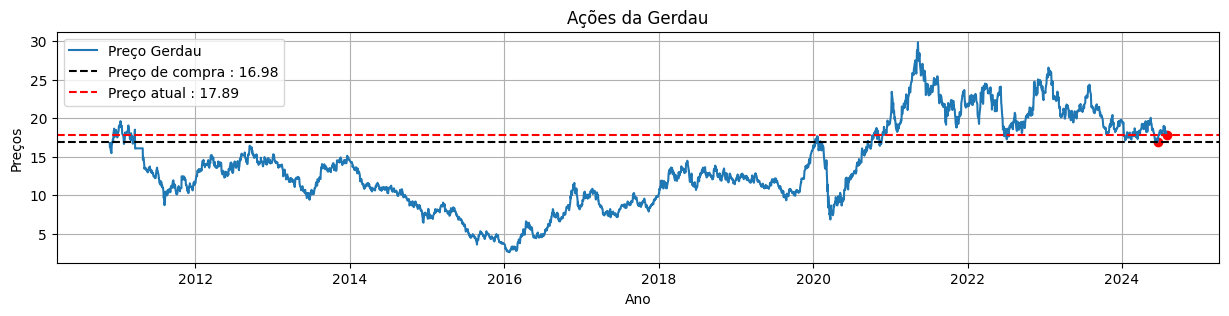

In [12]:
# PLOTANDO O GRÁFICO E COLOCANDO UMA LINHA TRACEJADA COMO REFERÊNCIA DO VALOR ATUAL DO ATIVO
plt.figure(figsize=(15,3))
plt.plot(precos_acoes["Close"], label="Preço Gerdau")

plt.scatter(data_compra_filtro,preco_compra_filtro, color='red')
plt.axhline(preco_compra_filtro, color='black', linestyle='--', label = f'Preço de compra : {preco_compra_filtro:.2f}')

plt.scatter(data_atual,preco_atual, color='red')
plt.axhline(preco_atual, color='red', linestyle='--', label = f'Preço atual : {preco_atual:.2f}')

plt.title("Ações da Gerdau")
plt.ylabel("Preços")
plt.xlabel("Ano")
plt.grid()
plt.legend()
plt.show()

In [13]:
# DETERMINANDO A PORCENTAGEM DE GANHO/PERDA 
porcentagem = ((preco_atual-preco_compra_filtro)/preco_compra_filtro)*100

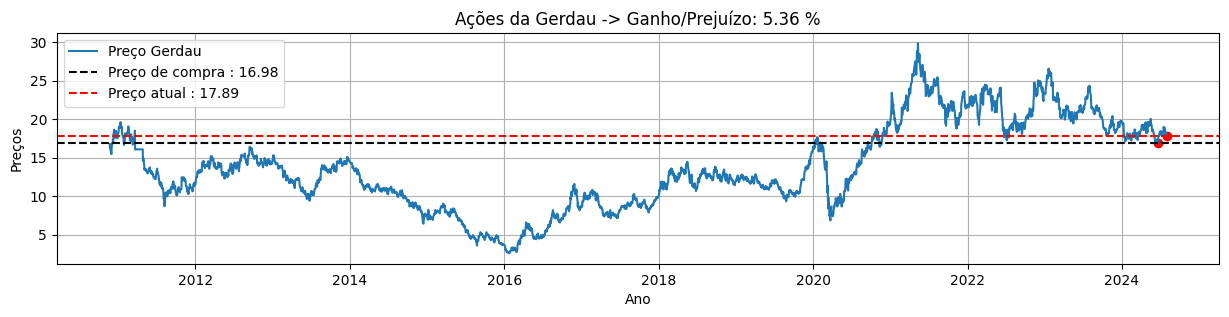

In [14]:
# EXIBINDO A PORCENTAGEM DE GANHO/PERDA E PLOTANDO O GRÁFICO 
plt.figure(figsize=(15,3))
plt.plot(precos_acoes["Close"], label="Preço Gerdau")

plt.scatter(data_compra_filtro,preco_compra_filtro, color='red')
plt.axhline(preco_compra_filtro, color='black', linestyle='--', label = f'Preço de compra : {preco_compra_filtro:.2f}')

plt.scatter(data_atual,preco_atual, color='red')
plt.axhline(preco_atual, color='red', linestyle='--', label = f'Preço atual : {preco_atual:.2f}')

plt.title(f"Ações da Gerdau -> Ganho/Prejuízo: {porcentagem:.2f} %")
plt.ylabel("Preços")
plt.xlabel("Ano")
plt.grid()
plt.legend()
plt.show()

In [15]:
# DETERMINANDO A PORCENTAGEM DE GANHO (PORCENTAGEM DE RETORNO)
porcent = 2.731
porcentagem_alvo = ((porcent/100)*preco_compra_filtro)+preco_compra_filtro

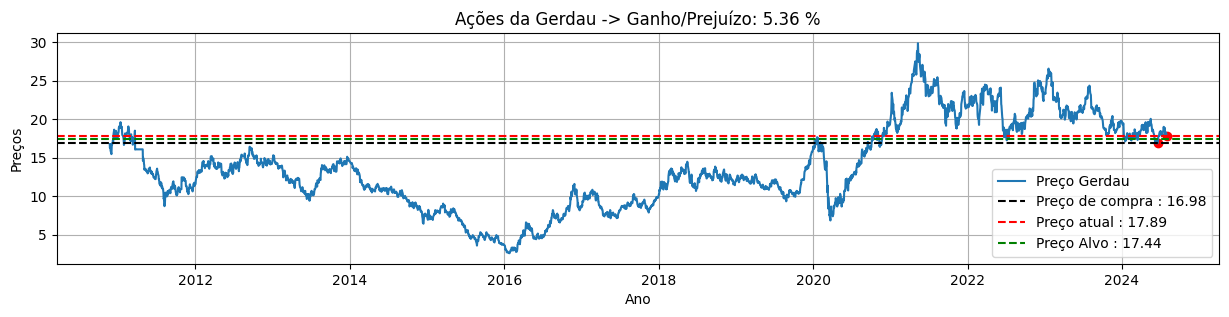

In [16]:
# EXIBINDO A PORCENTAGEM DE GANHO/PERDA E PLOTANDO O GRÁFICO E COLOCANDO UMA LINHA TRACEJADA COMO REFERÊNCIA DO VALOR DO ALVO 
plt.figure(figsize=(15,3))
plt.plot(precos_acoes["Close"], label="Preço Gerdau")

plt.scatter(data_compra_filtro,preco_compra_filtro, color='red')
plt.axhline(preco_compra_filtro, color='black', linestyle='--', label = f'Preço de compra : {preco_compra_filtro:.2f}')

plt.scatter(data_atual,preco_atual, color='red')
plt.axhline(preco_atual, color='red', linestyle='--', label = f'Preço atual : {preco_atual:.2f}')

plt.axhline(porcentagem_alvo, color='green', linestyle='--', label = f'Preço Alvo : {porcentagem_alvo:.2f}')

plt.title(f"Ações da Gerdau -> Ganho/Prejuízo: {porcentagem:.2f} %")
plt.ylabel("Preços")
plt.xlabel("Ano")
plt.grid()
plt.legend()
plt.show()

In [17]:
# CRIANDO MAIS TRÊS COLUNAS NO DATAFRAME (precos_acoes)
precos_acoes["nome_dia"] = precos_acoes.index.day_name()
precos_acoes["mes"] = precos_acoes.index.month
precos_acoes["ano"] = precos_acoes.index.year
precos_acoes

,Open,High,Low,Close,Adj Close,Volume,nome_dia,mes,ano
Date,,,,,,,,,
2010-11-22,17.134920,17.142857,16.626984,16.738094,10.158787,5319216,Monday,11,2010
2010-11-23,16.349207,16.563492,16.269840,16.269840,9.874596,6142752,Tuesday,11,2010
2010-11-24,16.428572,16.793650,16.373014,16.746031,10.163604,5596164,Wednesday,11,2010
2010-11-25,16.642857,16.698412,16.325396,16.325396,9.908312,3633210,Thursday,11,2010
2010-11-26,16.190475,16.317459,15.817460,15.928571,9.667468,7466634,Friday,11,2010
...,...,...,...,...,...,...,...,...,...
2024-07-24,18.040001,18.129999,17.610001,17.950001,17.950001,15129600,Wednesday,7,2024
2024-07-25,17.820000,18.480000,17.780001,18.320000,18.320000,13581600,Thursday,7,2024
2024-07-26,18.120001,18.389999,17.930000,18.320000,18.320000,11820100,Friday,7,2024


In [18]:
# FAZENDO UM FILTRO PELA COLUNA NOME_DIA E OBTENDO APENAS OS PREÇOS DE FECHAMENTO DA SEGUNDA-FEIRA (MONDAY)
filtro_dia = precos_acoes.query("nome_dia == 'Monday' ")
filtro_dia = filtro_dia.copy()
filtro_dia

,Open,High,Low,Close,Adj Close,Volume,nome_dia,mes,ano
Date,,,,,,,,,
2010-11-22,17.134920,17.142857,16.626984,16.738094,10.158787,5319216,Monday,11,2010
2010-11-29,15.849206,15.992063,15.396825,15.555555,9.441075,7019964,Monday,11,2010
2010-12-06,16.753967,17.063492,16.753967,16.920633,10.269574,4350150,Monday,12,2010
2010-12-13,18.309523,18.753967,18.198412,18.650793,11.319657,11096190,Monday,12,2010
2010-12-20,18.253967,18.253967,17.690475,17.690475,10.736815,7106274,Monday,12,2010
...,...,...,...,...,...,...,...,...,...
2024-07-01,18.410000,18.500000,18.129999,18.320000,18.320000,7030800,Monday,7,2024
2024-07-08,17.910000,18.080000,17.700001,17.799999,17.799999,7197500,Monday,7,2024
2024-07-15,18.270000,18.690001,18.160000,18.600000,18.600000,7465600,Monday,7,2024


In [19]:
# FAZENDO A DIFERENÇA ENTRE OS PREÇOS DE FECHAMENTO ENTRE A SEMANA SEGUINTE COM A SEMANA ANTERIOR
filtro_dia["diff_preco"] = filtro_dia["Close"].diff()
filtro_dia

,Open,High,Low,Close,Adj Close,Volume,nome_dia,mes,ano,diff_preco
Date,,,,,,,,,,
2010-11-22,17.134920,17.142857,16.626984,16.738094,10.158787,5319216,Monday,11,2010,NaN
2010-11-29,15.849206,15.992063,15.396825,15.555555,9.441075,7019964,Monday,11,2010,-1.182539
2010-12-06,16.753967,17.063492,16.753967,16.920633,10.269574,4350150,Monday,12,2010,1.365078
2010-12-13,18.309523,18.753967,18.198412,18.650793,11.319657,11096190,Monday,12,2010,1.730160
2010-12-20,18.253967,18.253967,17.690475,17.690475,10.736815,7106274,Monday,12,2010,-0.960318
...,...,...,...,...,...,...,...,...,...,...
2024-07-01,18.410000,18.500000,18.129999,18.320000,18.320000,7030800,Monday,7,2024,0.469999
2024-07-08,17.910000,18.080000,17.700001,17.799999,17.799999,7197500,Monday,7,2024,-0.520000
2024-07-15,18.270000,18.690001,18.160000,18.600000,18.600000,7465600,Monday,7,2024,0.800001


In [20]:
# CRIANDO MAIS UMA COLUNA COM A PORCENTAGEM DA DIFERENÇA ENTRE OS PREÇOS DA COLUNA CRIADA ANTERIORMENTE (diff_preco)
filtro_dia["porcentagem_diff"] = round(filtro_dia["diff_preco"]/filtro_dia["Close"].shift(1)*100,2)
filtro_dia

,Open,High,Low,Close,Adj Close,Volume,nome_dia,mes,ano,diff_preco,porcentagem_diff
Date,,,,,,,,,,,
2010-11-22,17.134920,17.142857,16.626984,16.738094,10.158787,5319216,Monday,11,2010,NaN,NaN
2010-11-29,15.849206,15.992063,15.396825,15.555555,9.441075,7019964,Monday,11,2010,-1.182539,-7.06
2010-12-06,16.753967,17.063492,16.753967,16.920633,10.269574,4350150,Monday,12,2010,1.365078,8.78
2010-12-13,18.309523,18.753967,18.198412,18.650793,11.319657,11096190,Monday,12,2010,1.730160,10.23
2010-12-20,18.253967,18.253967,17.690475,17.690475,10.736815,7106274,Monday,12,2010,-0.960318,-5.15
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,18.410000,18.500000,18.129999,18.320000,18.320000,7030800,Monday,7,2024,0.469999,2.63
2024-07-08,17.910000,18.080000,17.700001,17.799999,17.799999,7197500,Monday,7,2024,-0.520000,-2.84
2024-07-15,18.270000,18.690001,18.160000,18.600000,18.600000,7465600,Monday,7,2024,0.800001,4.49


In [21]:
# OBTENDO, DA COLUNA (porcentagem_diff), APENAS AS PORCENTAGENS POSITIVAS
filtro_porcentagem = filtro_dia.query("porcentagem_diff > 0")
filtro_porcentagem

,Open,High,Low,Close,Adj Close,Volume,nome_dia,mes,ano,diff_preco,porcentagem_diff
Date,,,,,,,,,,,
2010-12-06,16.753967,17.063492,16.753967,16.920633,10.269574,4350150,Monday,12,2010,1.365078,8.78
2010-12-13,18.309523,18.753967,18.198412,18.650793,11.319657,11096190,Monday,12,2010,1.730160,10.23
2010-12-27,18.095238,18.206348,17.928572,17.928572,10.881320,2791026,Monday,12,2010,0.238096,1.35
2011-01-03,18.301586,18.523809,18.142857,18.357141,11.141430,5084352,Monday,1,2011,0.428570,2.39
2011-01-10,18.865080,19.103174,18.722221,18.849207,11.440079,5417370,Monday,1,2011,0.492065,2.68
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-17,16.889999,16.950001,16.680000,16.889999,16.889999,7319800,Monday,6,2024,0.039999,0.24
2024-06-24,17.670000,17.959999,17.629999,17.850000,17.850000,8537300,Monday,6,2024,0.960001,5.68
2024-07-01,18.410000,18.500000,18.129999,18.320000,18.320000,7030800,Monday,7,2024,0.469999,2.63


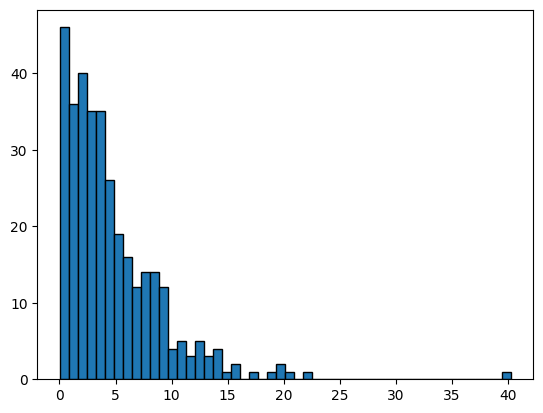

In [22]:
# PLOTANDO O HISTOGRAMA DA COLUNA (porcentagem_diff) COM OS VALORES POSITIVOS
plt.hist(filtro_porcentagem["porcentagem_diff"], bins=50, edgecolor="black")
plt.show()

In [23]:
# CALCULANDO A MÉDIA DAS 10 PORCENTAGENS QUE POSSUEM MAIOR FREQUÊNCIA NA COLUNA (porcentagem_diff)
porcentagem = filtro_porcentagem["porcentagem_diff"]
porcentage_freq_df = porcentagem.value_counts().reset_index()
porcentage_freq_df.columns = ["porcentagem_diff","frequencia"]
porcentage_freq_df = porcentage_freq_df.sort_values(by="frequencia", ascending=False).reset_index(drop=True)
porcentage_freq_df = porcentage_freq_df.head(10)
media_freq = porcentage_freq_df["porcentagem_diff"].mean()

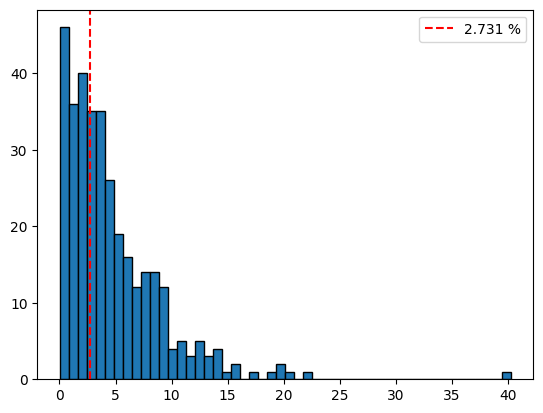

In [24]:
# PLOTANDO O HISTOGRAMA COM A LINHA VERTICAL TRACEJADA INDICANDO A MÉDIA DA PORCENTAGEM DE REFERÊNCIA
plt.hist(porcentagem, bins=50, edgecolor="black")
plt.axvline(media_freq, linestyle="--", color='red', label = f'{media_freq} %')
plt.legend()
plt.show()

In [25]:
# ÍNDICE DE FORÇA RELATIVA IFR (RSI)
# OBTENDO O DATAFRAME COM DUAS COLUNAS (Data e Close)
# CRIANDO NOVAS COLUNAS NESSE DATAFRAME 
IFR_df = pd.DataFrame(precos_acoes["Close"])[3000:]
IFR_df["diff_valores"] = IFR_df["Close"].diff()
IFR_df["ganho"] = IFR_df["diff_valores"].clip(lower=0)
IFR_df["perda"] = IFR_df["diff_valores"].clip(upper=0).abs()
IFR_df["media_ganho"] = IFR_df["ganho"].rolling(window=14, min_periods=1).mean()
IFR_df["media_perda"] = IFR_df["perda"].rolling(window=14, min_periods=1).mean()
IFR_df

,Close,diff_valores,ganho,perda,media_ganho,media_perda
Date,,,,,,
2022-12-22,23.698412,NaN,NaN,NaN,NaN,NaN
2022-12-23,22.777777,-0.920635,0.000000,0.920635,0.000000,0.920635
2022-12-26,22.365080,-0.412697,0.000000,0.412697,0.000000,0.666666
2022-12-27,23.476191,1.111111,1.111111,0.000000,0.370370,0.444444
2022-12-28,23.373014,-0.103176,0.000000,0.103176,0.277778,0.359127
...,...,...,...,...,...,...
2024-07-24,17.950001,-0.090000,0.000000,0.090000,0.104286,0.125000
2024-07-25,18.320000,0.369999,0.369999,0.000000,0.130714,0.107857
2024-07-26,18.320000,0.000000,0.000000,0.000000,0.130714,0.093571


In [26]:
# CALCULANDO O ÍNDICE DE FORÇA RELATIVA E CRIANDO NOVAS COLUNAS (IFR, valor_up, valor_down)
IFR_df["IFR"] = 100-(100/(1+IFR_df["media_ganho"]/IFR_df["media_perda"]))
IFR_df["valor_up"] = IFR_df["IFR"].apply(lambda x: x if x > 70 else np.nan)
IFR_df["valor_down"] = IFR_df["IFR"].apply(lambda x: x if x < 30 else np.nan)
IFR_df

,Close,diff_valores,ganho,perda,media_ganho,media_perda,IFR,valor_up,valor_down
Date,,,,,,,,,
2022-12-22,23.698412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-23,22.777777,-0.920635,0.000000,0.920635,0.000000,0.920635,0.000000,NaN,0.0
2022-12-26,22.365080,-0.412697,0.000000,0.412697,0.000000,0.666666,0.000000,NaN,0.0
2022-12-27,23.476191,1.111111,1.111111,0.000000,0.370370,0.444444,45.454560,NaN,NaN
2022-12-28,23.373014,-0.103176,0.000000,0.103176,0.277778,0.359127,43.613694,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-07-24,17.950001,-0.090000,0.000000,0.090000,0.104286,0.125000,45.482883,NaN,NaN
2024-07-25,18.320000,0.369999,0.369999,0.000000,0.130714,0.107857,54.790414,NaN,NaN
2024-07-26,18.320000,0.000000,0.000000,0.000000,0.130714,0.093571,58.280264,NaN,NaN


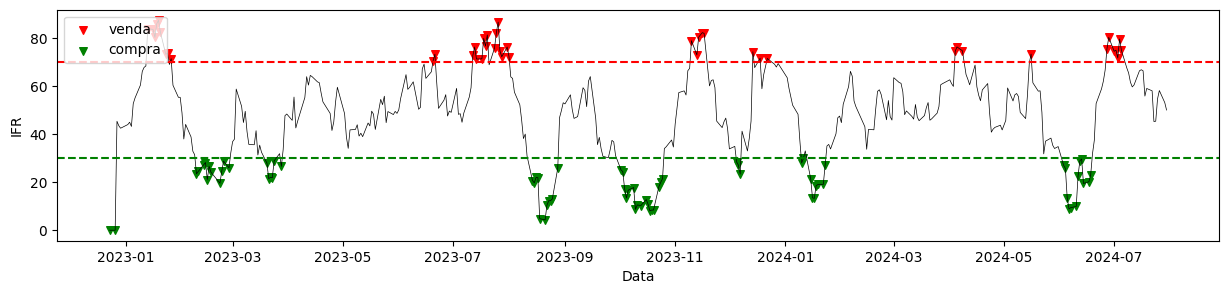

In [27]:
# PLOTANDO O GRÁFICO DO INDICE DE FORÇA RELATIVA COM SUAS LINHAS DE LIMITE SUPERIOR E INFERIOR E SEUS RESPECTIVOS MARCADORES.
plt.figure(figsize=(15, 3))
plt.plot(IFR_df.index, IFR_df["IFR"], color="black", linewidth=0.5)
plt.scatter(IFR_df.index, IFR_df["valor_up"], color="red", label="venda", marker='v', s=30)
plt.scatter(IFR_df.index, IFR_df["valor_down"], color="green", label="compra", marker='v', s=30)
plt.axhline(y=70, color="red", linestyle="--")
plt.axhline(y=30, color="green", linestyle="--")
plt.xlabel('Data')
plt.ylabel('IFR')
plt.legend(loc="upper left")
plt.show()

In [33]:
# BANDAS DE BOLLINGER(RSI)
# OBTENDO O DATAFRAME COM DUAS COLUNAS (Data e Close)
# CRIANDO NOVAS COLUNAS NESSE DATAFRAME 
BBollinger_df = pd.DataFrame(precos_acoes["Close"])[3000:]
num_desvio = 2
periodo = 14
BBollinger_df["MM"] = BBollinger_df["Close"].rolling(window=periodo).mean()
BBollinger_df["STD"] = BBollinger_df["Close"].rolling(window=periodo).std()
BBollinger_df["upper"] = BBollinger_df["MM"] + (BBollinger_df["STD"]*num_desvio)
BBollinger_df["lower"] = BBollinger_df["MM"] - (BBollinger_df["STD"]*num_desvio)
BBollinger_df

,Close,MM,STD,upper,lower
Date,,,,,
2022-12-22,23.698412,NaN,NaN,NaN,NaN
2022-12-23,22.777777,NaN,NaN,NaN,NaN
2022-12-26,22.365080,NaN,NaN,NaN,NaN
2022-12-27,23.476191,NaN,NaN,NaN,NaN
2022-12-28,23.373014,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-07-24,17.950001,18.353572,0.454272,19.262116,17.445027
2024-07-25,18.320000,18.376429,0.443025,19.262478,17.490379
2024-07-26,18.320000,18.413572,0.411668,19.236908,17.590235


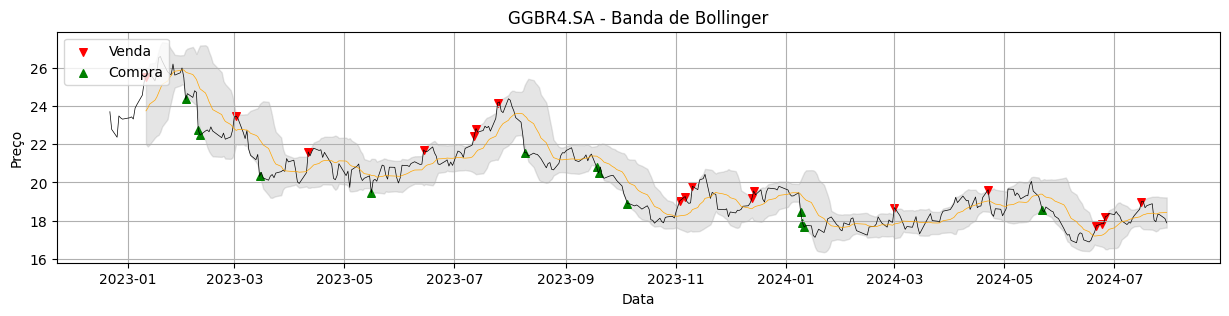

In [34]:
# PLOTANDO O GRÁFICO DAS BANDAS DE BOLLINGER COM SUAS LINHAS DE DESVIO PADRÃO SUPERIOR E DESVIO PADRÃO INFERIOR E SEUS RESPECTIVOS MARCADORES.
plt.figure(figsize=(15,3))
plt.plot(BBollinger_df.index, BBollinger_df['Close'], linewidth=0.5, color='black')
plt.plot(BBollinger_df.index, BBollinger_df['MM'], linewidth=0.5, color='orange')
plt.fill_between(BBollinger_df.index, BBollinger_df['upper'], BBollinger_df['lower'], color='gray', alpha=0.2)
venda = BBollinger_df['Close'] > BBollinger_df['upper']
compra = BBollinger_df['Close'] < BBollinger_df['lower']
plt.scatter(BBollinger_df.index[venda], BBollinger_df['Close'][venda], color='red', label='Venda', marker='v', s=30)
plt.scatter(BBollinger_df.index[compra], BBollinger_df['Close'][compra], color='green', label='Compra', marker='^', s=30)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title(f'{ticker} - Banda de Bollinger')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()